In [1]:
#Merging of Market and Economic Data
import quandl as q
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pylab
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

In [2]:
#import macro data
data_gdp = q.get("FRED/GDPC1", start_date="2014-04-01", end_date="2019-06-01",collapse='weekly', 
                 authtoken="oWpRXksxc4gyrtAwXe18")
%store data_gdp

data_infl = q.get("FRED/CPIAUCSL", start_date="2014-06-01", end_date="2019-06-01",collapse='weekly', 
                  authtoken="oWpRXksxc4gyrtAwXe18")
%store data_infl

data_int = q.get("FRED/DFF", start_date="2014-06-01", end_date="2019-06-01",collapse='weekly', 
                 authtoken="oWpRXksxc4gyrtAwXe18")
%store data_int

data_unemp = q.get("FRED/UNRATE", start_date="2014-06-01", end_date="2019-06-01",collapse='weekly', 
                   authtoken="oWpRXksxc4gyrtAwXe18")
%store data_unemp

data_savings = q.get("FRED/PSAVERT", start_date="2014-06-01", end_date="2019-06-01",collapse='weekly', 
                     authtoken="oWpRXksxc4gyrtAwXe18")
%store data_savings


Stored 'data_gdp' (DataFrame)
Stored 'data_infl' (DataFrame)
Stored 'data_int' (DataFrame)
Stored 'data_unemp' (DataFrame)
Stored 'data_savings' (DataFrame)


In [3]:
data_gdp

,Value
Date,
2014-04-06,16841.475
2014-07-06,17047.098
2014-10-05,17143.038
2015-01-04,17277.580
2015-04-05,17405.669
2015-07-05,17463.222
2015-10-04,17468.902
2016-01-03,17556.839
2016-04-03,17639.417


In [4]:
macro_data = pd.concat([data_gdp,data_infl,data_int,data_unemp,data_savings],axis=1)

In [5]:
#import market sentiment adjusted close price
data_vix = pd.read_csv('VIX.csv', header=0,usecols=['Date','Adj Close'], 
                   parse_dates=True, index_col='Date')

In [6]:
macro_market_data = pd.concat([macro_data, data_vix], axis=1)

In [7]:
macro_market_data.columns = ['Real GDP','CPI All','Fed Rate','Unemployment rate','Personal Savings Rate','VIX']

In [8]:
df = pd.DataFrame(macro_market_data)
df = df.fillna(method='ffill')
df = df.dropna()

In [9]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
print(scaled_data)

[[0.         0.12206732 0.00840336 0.96153846 0.48       0.10887949]
 [0.         0.12206732 0.01260504 0.96153846 0.48       0.10887949]
 [0.         0.12206732 0.01680672 0.96153846 0.48       0.10887949]
 ...
 [1.         0.99271385 0.9789916  0.         0.68       0.48625788]
 [1.         0.99271385 0.97478992 0.         0.68       0.48625788]
 [1.         1.         0.98319328 0.03846154 0.72       0.48625788]]


In [10]:
len(scaled_data)

313

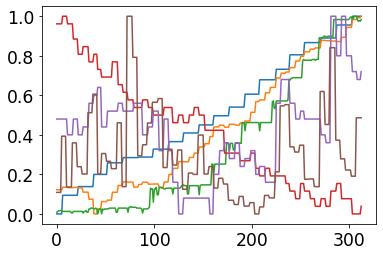

In [11]:
plt.plot(scaled_data)

In [12]:
#principle compo 1 and 2
pca = PCA(n_components=3)
pca_component_macro_mkt = pca.fit_transform(scaled_data)

%store pca_component_macro_mkt

Stored 'pca_component_macro_mkt' (ndarray)


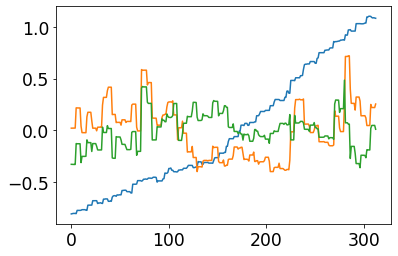

In [13]:
plt.plot(pca_component_macro_mkt)